In [ ]:
import pandas as pd;
from google.colab import files

import io

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
uploaded = files.upload()

Saving dataset2.csv to dataset2 (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['dataset2.csv']), header=None)
df.head(3)

,0,1,2
0,-6.126607,17.645113,6.095544
1,5.602577,5.034192,-10.091931
2,2.179934,9.876991,7.160241


In [ ]:
distances = pdist(df, metric='euclidean')

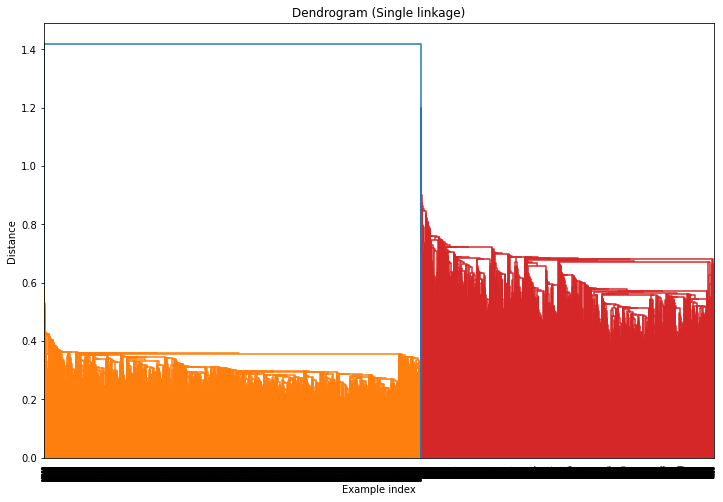

In [ ]:
# Perform hierarchical clustering using single linkage
Z_single = linkage(distances, method='single')

# Plot the dendrogram for single linkage
plt.figure(figsize=(12, 8))
dendrogram(Z_single)
plt.xlabel('Example index')
plt.ylabel('Distance')
plt.title('Dendrogram (Single linkage)')
plt.show()

When creating dendrograms to visualize hierarchical clustering, we often want to determine the optimal number of clusters to use. One common approach is to use a threshold value to cut the dendrogram at the tallest vertical line. This threshold value determines how many clusters will be formed.

However, it can be difficult to visually determine the tallest vertical line, especially when dealing with a large amount of data. One alternative method is to loop through different threshold values and observe the resulting number of clusters for each threshold.

By doing so, we can identify the range of threshold values for which the number of clusters remains the same. This range of threshold values corresponds to a region where the vertical lines are all relatively tall.

To determine the optimal number of clusters, we can simply choose the value that appears most frequently within this range of threshold values. This approach ensures that we are selecting a stable and consistent number of clusters, which can be useful for downstream analyses.







In [ ]:
from scipy.cluster.hierarchy import fcluster

# Loop over a range of thresholds and output the number of clusters for each
for threshold in np.arange(1, 1.2, 0.0125):
    # Use fcluster to determine the final number of clusters
    clusters = fcluster(Z_single, threshold, criterion='distance')

    # Print the number of clusters
    n_clusters = len(set(clusters))
    print("Threshold:", threshold, "| Number of clusters:", n_clusters)

Threshold: 1.0 | Number of clusters: 5
Threshold: 1.0125 | Number of clusters: 5
Threshold: 1.025 | Number of clusters: 5
Threshold: 1.0374999999999999 | Number of clusters: 4
Threshold: 1.0499999999999998 | Number of clusters: 4
Threshold: 1.0624999999999998 | Number of clusters: 4
Threshold: 1.0749999999999997 | Number of clusters: 4
Threshold: 1.0874999999999997 | Number of clusters: 4
Threshold: 1.0999999999999996 | Number of clusters: 4
Threshold: 1.1124999999999996 | Number of clusters: 4
Threshold: 1.1249999999999996 | Number of clusters: 4
Threshold: 1.1374999999999995 | Number of clusters: 4
Threshold: 1.1499999999999995 | Number of clusters: 4
Threshold: 1.1624999999999994 | Number of clusters: 3
Threshold: 1.1749999999999994 | Number of clusters: 3
Threshold: 1.1874999999999993 | Number of clusters: 3


When analyzing the dendrogram created using single linkage, a threshold range of 1.037 to 1.145 resulted in the formation of 4 clusters. This range is the longest between the threshold values of 1 and 1.2, where the number of clusters remains constant.

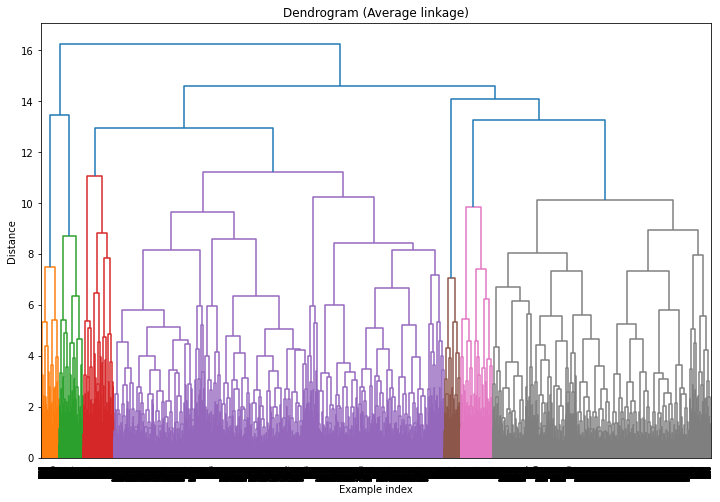

In [ ]:
# Perform hierarchical clustering using single linkage
Z_avg = linkage(distances, method='average')

# Plot the dendrogram for single linkage
plt.figure(figsize=(12, 8))
dendrogram(Z_avg)
plt.xlabel('Example index')
plt.ylabel('Distance')
plt.title('Dendrogram (Average linkage)')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Loop over a range of thresholds and output the number of clusters for each
for threshold in np.arange(10, 16, 0.25):
    # Use fcluster to determine the final number of clusters
    clusters = fcluster(Z_avg, threshold, criterion='distance')

    # Print the number of clusters
    n_clusters = len(set(clusters))
    print("Threshold:", threshold, "| Number of clusters:", n_clusters)

Threshold: 10.0 | Number of clusters: 11
Threshold: 10.25 | Number of clusters: 9
Threshold: 10.5 | Number of clusters: 9
Threshold: 10.75 | Number of clusters: 9
Threshold: 11.0 | Number of clusters: 9
Threshold: 11.25 | Number of clusters: 7
Threshold: 11.5 | Number of clusters: 7
Threshold: 11.75 | Number of clusters: 7
Threshold: 12.0 | Number of clusters: 7
Threshold: 12.25 | Number of clusters: 7
Threshold: 12.5 | Number of clusters: 7
Threshold: 12.75 | Number of clusters: 7
Threshold: 13.0 | Number of clusters: 6
Threshold: 13.25 | Number of clusters: 6
Threshold: 13.5 | Number of clusters: 4
Threshold: 13.75 | Number of clusters: 4
Threshold: 14.0 | Number of clusters: 4
Threshold: 14.25 | Number of clusters: 3
Threshold: 14.5 | Number of clusters: 3
Threshold: 14.75 | Number of clusters: 2
Threshold: 15.0 | Number of clusters: 2
Threshold: 15.25 | Number of clusters: 2
Threshold: 15.5 | Number of clusters: 2
Threshold: 15.75 | Number of clusters: 2


By examining the dendrogram constructed with average linkage on the otherhand, it was observed that a range of threshold values between 11.25 and 12.75 led to the formation of 7 distinct clusters. This threshold range represents the most extended span between the values of 10 and 16, where the number of clusters did not change.